# Dry Beans Competition
Notebook : Copy of kaggle_notebook Dry beans competition version 1

Auther : Fatema Samir 

Date : 4/5/2022
Last Update 22/5/2022



# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy.random.mtrand import rand
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import pickle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.mixture import GaussianMixture
from sklearn.multiclass import OneVsOneClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Original Data

In [ ]:
# Read Data
def Readdata(path):
  All_Data = pd.read_csv(path)
  # Target Manual Encoding case train file
  All_Data.replace({'y':{'BARBUNYA':1,'BOMBAY':2,'CALI':3,'DERMASON':4,'HOROZ':5,'SEKER':6,'SIRA':7}},inplace=True)
  print(All_Data.shape)
  print(All_Data['y'].value_counts())
  return All_Data

In [ ]:
def SpliteData():
  

# Show some information About Data

In [ ]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [ ]:
All_Data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [ ]:
All_Data.drop(['ID'],axis = 1,inplace=True)

In [ ]:
All_Data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


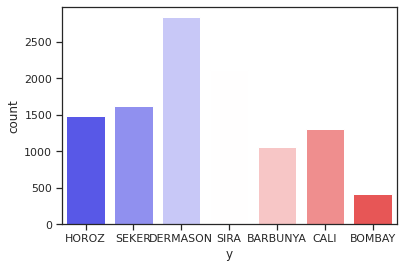

In [ ]:
sns.set(style="ticks")
f = sns.countplot(x="y", data=All_Data, palette="bwr")
plt.show()

In [ ]:
All_Data['y'].value_counts() # count values for each class 

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

# Upsampling Data 

In [ ]:
def apply_Upsmote(df):
  # Upsample each class to 3000 sample
  data = df.values
  x, y = data[:, :-1], data[:, -1]

  # set each label to 3000
  # strategy = {1:3000, 2:3000, 3:3000, 4:3000, 5:3000, 6:3000,7:3000}
  # oversample = SMOTE(sampling_strategy=strategy)
  oversample = SMOTE()
  features, target = oversample.fit_resample(x, y)

  # convert to Dataframe
  oversampled_data =pd.concat([ pd.DataFrame(features),pd.DataFrame(target)], axis=1)
  # oversampled_data[0]=oversampled_data[0].astype(int) # set ID col as int
  oversampled_data.columns= list(df.columns)
 
  return oversampled_data

In [ ]:
def apply_SMOTEENN(df):
  # Upsample each class to 3000 sample
  data = df.values
  x, y = data[:, :-1], data[:, -1]
  oversample = SMOTEENN(random_state=42)
  features, target = oversample.fit_resample(x, y)

  # convert to Dataframe
  oversampled_data =pd.concat([ pd.DataFrame(features),pd.DataFrame(target)], axis=1)
  # oversampled_data[0]=oversampled_data[0].astype(int) # set ID col as int
  oversampled_data.columns= list(df.columns)
 
  return oversampled_data

# Cross Validation

In [ ]:
def apply_stratifiedKFold(oversampled_data):
  data = oversampled_data.values
  x, y = data[:, :-1], data[:, -1]
  skf = StratifiedKFold(n_splits=5)
  skf.get_n_splits(x, y)
  col_names = oversampled_data.columns.to_list()
  StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
  train_dfs,valid_dfs =list(),list()
 
  for train_index, test_index in skf.split(x, y):
      #print("TRAIN:", train_index, "TEST:", test_index)
      X_train, X_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      trainX = pd.DataFrame(X_train)
      trainy= pd.DataFrame(y_train)

      testX= pd.DataFrame(X_test)
      testy=pd.DataFrame(y_test)

      train=pd.concat([trainX,trainy],axis=1)
      test=pd.concat([testX,testy],axis=1)
      
      train.columns=col_names

      test.columns=col_names
    
      train_dfs.append(train)
      valid_dfs.append(test)

  return train_dfs , valid_dfs

# **Feature** **Extraction**

## Sacalling

In [ ]:
def apply_MinMaxScaler(X):
  scaler = MinMaxScaler()
  scaler.fit(X)
  # scaler = pd.DataFrame(scaler.transform(X), columns = X.columns)
  return scaler

def apply_StandardScaler(X):
  scaler = StandardScaler()
  scaler.fit(X)
  # scaled_X = pd.DataFrame(scaler.transform(X), columns = X.columns)
  return scaler

def apply_PowerTransformer(X):
  transformer = PowerTransformer()
  # Create a list of the variables that you need to scale
  transformer.fit(X)
  # scaled_X = pd.DataFrame(transformer.transform(X), columns = X.columns)
  return transformer

## ` Apply **PCA** `

In [ ]:
def pca_fun(scaled_X, n_components):
  # y_list = Y.to_numpy() # very important
  # y_list
  pca = PCA(n_components = n_components)
  X_pca = pca.fit_transform(scaled_X)
  PCA_X = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
  # PCA_df = pd.concat([PCA_df,Y], axis = 1)
  # PCA_df['y'] = y_list
  # # PCA_X.head()
  return PCA_X

In [ ]:
def apply_pca(scaled_X, n_components):
  pca = PCA(n_components)
  pca.fit(scaled_X)
  return pca

## ` Apply Linear Discriminant Analysis (**LDA**)`

In [ ]:
#https://stats.stackexchange.com/questions/368566/why-with-two-classes-lda-gives-only-one-dimension
def apply_LDA(scaled_X, Y, n_components):
  lda  = LDA(n_components=6) 
  X_train_lda = lda.fit_transform(scaled_X,Y)
  # X_test_lda  = lda.transform(X_test)
  lda_X = pd.DataFrame(data = X_train_lda)
  return lda_X

# Clustring

In [ ]:
def apply_gmm(pca_X):
  gmm = GaussianMixture(n_components=7)
  gmm.fit(pca_X)
  probability= gmm.predict_proba(pca_X)
  gmm_x = pd.concat([pd.DataFrame(pca_X),pd.DataFrame(probability)],axis=1)
  return gmm, gmm_x

# Handel Outliers

In [ ]:
from scipy import stats
def removeOutliers(df,outliersColomns):
    z_scores = stats. zscore(df[outliersColomns]) 
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = df[filtered_entries]
    return new_df

y_labels = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
def removeOutliers_cat(df_raw,outliersColomns):
    df = df_raw.copy()
    for cat_ in y_labels:
        df_ = df[df['y']==cat_]
        z_scores = stats. zscore(df_[outliersColomns]) 
        abs_z_scores = np. abs(z_scores)
        filtered_entries = (abs_z_scores < 4). all(axis=1)
        df_ = df_[filtered_entries]
        df = df[df['y']!=cat_]
        df = df.append(df_)
    return df

# Model



In [ ]:
def apply_svm(xtrain,ytrain,xvalid,yvalid):
  # svc = SVC(C=30,random_state=42)#,gamma= 0.7, kernel= 'poly',degree=3,
  svc = SVC(C= 30,  random_state=42)
  svc.fit(xtrain,ytrain)
  predictions = svc.predict(xvalid)

  score_train = svc.score(xtrain, ytrain)
  f1score_val = f1_score(yvalid, predictions, average="micro")
  print(confusion_matrix(yvalid, predictions))
  print(f'Train score accuracy : {score_train} \t  valiation accuracy : {accuracy_score(yvalid, predictions)}')
  return score_train,f1score_val,svc

In [ ]:
def apply_XGBoost(xtrain,ytrain,xvalid,yvalid):
  xgb_model = XGBClassifier( random_state =42, objective='multi:softmax', max_depth=5, reg_alpha = 0.08, gamma=0.5, verbosity=0) 
  xgb_model.fit(xtrain,ytrain)
  predictions = xgb_model.predict(xvalid)

  score_train = xgb_model.score(xtrain, ytrain)
  f1score_val = f1_score(yvalid, predictions, average="micro")
  print(f'Train score: {score_train} \t  valiation accuracy : {accuracy_score(yvalid, predictions)}')
  return score_train,f1score_val,xgb_model


In [ ]:
def apply_AdaBoost(xtrain,ytrain,xvalid,yvalid):
  ada = AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 42), n_estimators = 100, random_state = 42)
  ada.fit(xtrain,ytrain)
  predictions = ada.predict(xvalid)

  score_train = ada.score(xtrain, ytrain)
  f1score_val = f1_score(yvalid, predictions, average="micro")
  print(confusion_matrix(yvalid, predictions))
  print(f'Train score accuracy : {score_train} \t  valiation accuracy : {accuracy_score(yvalid, predictions)}')
  return score_train,f1score_val,ada

In [ ]:
def apply_model(modelname,xtrain,ytrain,xvalid,yvalid):
  if modelname=='XGBoost':
    score_train , f1score_val, model = apply_XGBoost(xtrain,ytrain,xvalid,yvalid)

  if modelname=='SVM':
    score_train, f1score_val, model = apply_svm(xtrain,ytrain,xvalid,yvalid)

  if modelname=='ADA':
      score_train, f1score_val, model = apply_AdaBoost(xtrain,ytrain,xvalid,yvalid)

  return score_train,f1score_val,model

In [ ]:
# params_ada = {
#     "n_estimators": [5, 10, 15, 20, 50, 100],
#     "learning_rate": [0.1, 0.4, 0.6, 0.8, 1.0]
# }
# f1 = make_scorer(f1_score , average = "micro")
# gs_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params_ada, scoring = f1, n_jobs = -1)

# Run

In [ ]:
from pandas.core.apply import Apply
from numpy.random.mtrand import rand
def Run_experiment(path,classifier):
  Accuracies_train = []
  f1_score_valid = []
  # read Data 
  Data = Readdata(path)

  #upsampling using smote 
  samplingData = apply_SMOTEENN(Data)

  # drop id 
  All_Data = samplingData.drop('ID',axis=1)
  X = All_Data.drop(['y'], axis = 1)
  Y = All_Data['y']
  X = pd.get_dummies(X, prefix_sep='_')

  # Apply K_fold
  fold_no = 1
  skf = StratifiedKFold(n_splits=5)
  for train_index, val_index in skf.split(X, Y):
    index = val_index
    x_train, x_val  = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val  = Y.iloc[train_index], Y.iloc[val_index]

    # Apply Sacaling And PCA for each  train and text Data
    Scaled_train =  apply_StandardScaler(x_train)
    Scaled_val =  apply_StandardScaler(x_val)
    train_pca = pca_fun(Scaled_train, 7)
    val_pca = pca_fun(Scaled_val, 7)
    
    #Applay model 
    score_train, f1score_val, model = apply_model(classifier, train_pca, y_train, val_pca, y_val)
    
    Accuracies_train.append(score_train)
    f1_score_valid.append(f1score_val)

    print(f'Fold { str(fold_no)} Accuracy Train :{score_train}')
    print(f'Fold { str(fold_no)}  F1 score : {f1score_val}')
    fold_no += 1
  return Accuracies_train,f1_score_valid


In [ ]:
from pandas.core import apply
from pandas.core.apply import Apply
from numpy.random.mtrand import rand
def Run_experiment_s_ENN(path,classifier):
  outliersColomns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
                      'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
                      'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
                      'ShapeFactor3', 'ShapeFactor4']
  Accuracies_train = []
  f1_score_valid = []
  # read Data 
  Data = Readdata(path)
  # outlier_Data = removeOutliers(Data,outliersColomns)
  # print(outlier_Data.head())
  #upsampling using smote +enn 
  samplingData = apply_Upsmote(Data)

  # drop id 
  All_Data = samplingData.drop('ID',axis=1)
  X = All_Data.drop(['y'], axis = 1)
  Y = All_Data['y']
  # X = pd.get_dummies(X, prefix_sep='_')

  # Apply K_fold
  fold_no = 1
  skf = StratifiedKFold(n_splits=10)
  for train_index, val_index in skf.split(X, Y):
    index = val_index
    x_train, x_val  = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val  = Y.iloc[train_index], Y.iloc[val_index]

    # Apply Sacaling And PCA for each  train and text Data
    scalerr =  apply_StandardScaler(x_train)
    Scaled_train = scalerr.transform(x_train)
    Scaled_val =  scalerr.transform(x_val)
    pca_a = apply_pca(Scaled_train ,n_components=7) 
    train_pca = pca_a.transform(Scaled_train)
    val_pca = pca_a.transform(Scaled_val)
    
    gmm,gmm_train = apply_gmm(train_pca)
    probability = gmm.predict_proba(val_pca)
    gmm_valid = pd.concat([pd.DataFrame(val_pca),pd.DataFrame(probability)],axis=1)
    #Applay model 
    score_train, f1score_val, model = apply_model(classifier, gmm_train, y_train, gmm_valid, y_val)
    
    Accuracies_train.append(score_train)
    f1_score_valid.append(f1score_val)

    print(f'Fold { str(fold_no)} Accuracy Train :{score_train}')
    print(f'Fold { str(fold_no)}  F1 score : {f1score_val}')
    fold_no += 1
  return Accuracies_train,f1_score_valid,pca_a,scalerr,gmm,model
  # return Accuracies_train,f1_score_valid,pca_a,scalerr,model


In [ ]:
# run with smote+ENN + powr transformer/standerdscaler
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val, pca_b,scaler,gmm, model = Run_experiment_s_ENN(path,'ADA')
print(np.array(f1_score_val).mean())
print(np.array(Acc).mean())

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
[[272   0   9   0   1   0   2]
 [  0 283   0   0   0   0   0]
 [  8   0 270   0   5   1   0]
 [  1   0   0 255   0   1  27]
 [  0   0   5   1 269   0   9]
 [  2   0   0   2   0 274   6]
 [  5   0   0  16   2   3 257]]
Train score accuracy : 0.9928383595367314 	  valiation accuracy : 0.94662638469285
Fold 1 Accuracy Train :0.9928383595367314
Fold 1  F1 score : 0.94662638469285
[[265   0   9   0   1   1   8]
 [  0 283   0   0   0   0   0]
 [  6   0 271   0   2   1   4]
 [  1   0   0 249   2   4  27]
 [  1   0   4   0 273   0   6]
 [  4   0   0   6   0 266   8]
 [  0   0   1  26   4   5 248]]
Train score accuracy : 0.9897051418340513 	  valiation accuracy : 0.9340382678751259
Fold 2 Accuracy Train :0.9897051418340513
Fold 2  F1 score : 0.9340382678751259


In [ ]:
# run with smote+ENN + powr transformer/standerdscaler
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val, pca_b,scaler,gmm, model = Run_experiment_s_ENN(path,'SVM')
print(np.array(f1_score_val).mean())
print(np.array(Acc).mean())

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
[[270   0  10   0   1   0   3]
 [  0 283   0   0   0   0   0]
 [  6   0 271   0   5   1   1]
 [  0   0   0 264   0   4  16]
 [  0   0   3   1 270   0  10]
 [  1   0   0   2   0 277   4]
 [  3   0   0  18   1   2 259]]
Train score accuracy : 0.9575896603815811 	  valiation accuracy : 0.9536757301107754
Fold 1 Accuracy Train :0.9575896603815811
Fold 1  F1 score : 0.9536757301107754
[[266   0  10   0   1   1   6]
 [  0 283   0   0   0   0   0]
 [ 12   0 264   0   4   1   3]
 [  0   0   0 259   2   2  20]
 [  3   0   2   1 272   0   6]
 [  3   0   0   8   0 269   4]
 [  1   0   1  27   3   4 248]]
Train score accuracy : 0.9592122195490405 	  valiation accuracy : 0.9370594159113796
Fold 2 Accuracy Train :0.9592122195490405
Fold 2  F1 score : 0.9370594159113796
[[266   0  11   0   1   3   3]
 [  0 284   0   0   0   0   0]
 [  8   0 263   0   9   1   2]
 [  0   0   0 266   0   3  14]
 [  1 

In [ ]:
# test 
test = pd.read_csv('/content/drive/MyDrive/predect_others.csv')
test.replace({'y':{'BARBUNYA':1,'BOMBAY':2,'CALI':3,'DERMASON':4,'HOROZ':5,'SEKER':6,'SIRA':7}},inplace=True)
path ='/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/test.csv'
df = pd.read_csv(path)
# All_Data.head()
x = df.drop('ID',axis=1)
scaled_df = scaler.transform(x)
ft_selected = pca_b.transform(scaled_df)
probability = gmm.predict_proba(ft_selected)
gmm_test = pd.concat([pd.DataFrame(ft_selected),pd.DataFrame(probability)],axis=1)
# print(ft_selected)
# predect 

predect = model.predict(gmm_test)
f1score_val = f1_score(test['y'], predect, average="micro")
print(f1score_val)

0.9608711701734958


In [ ]:
# save model 
with open('/content/drive/MyDrive/OUTput_Model_DRB/model_96.pkl', 'wb') as file:
        pickle.dump(model, file)

In [ ]:
pred_df = pd.DataFrame(predect)
submit_df = pd.concat([df.iloc[:,0],pred_df],axis=1)
submit_df.columns=['ID','y']
submit_df.replace({'y':{1:'BARBUNYA',2:'BOMBAY',3:'CALI',4:'DERMASON',5:'HOROZ',6:'SEKER',7:'SIRA'}},inplace=True)
submit_df.to_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/submtion_ada.csv',index=False)
submit_df

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [ ]:
# try apply featur extraction on all data 
# according to this link 
#https://www.researchgate.net/post/Should_Feature_Selection_using_Feature_Importance_Scores_of_Tree-based_Algorithms_be_done_before_Train-Test_Split_or_after_that#:~:text=The%20conventional%20answer%20is%20to,%2C%20from%20the%20Test%2DSet.
from pandas.core.apply import Apply
from numpy.random.mtrand import rand
# X_train, X_test, y_train, y_test = train_test_split(X, y,)
def Run_f_befor_split(path,classifier,y_test,x_test):
  Accuracies_train = []
  f1_score_valid = []
  # read Data 
  Data = Readdata(path)
  # Data = Data.drop(['MinorAxisLength','MajorAxisLength'],axis=1) # try to drop un important 
  #upsampling using SMOTE 
  # samplingData = apply_Upsmote(Data)

  #upsampling using SMOTE + ENN 
  samplingData = apply_SMOTEENN(Data)

  # drop id 
  All_Data = samplingData.drop('ID',axis=1)
  print(All_Data['y'].value_counts())
  X = All_Data.drop(['y'], axis = 1)
  Y = All_Data['y']
  Scaled_X =  apply_StandardScaler(X)
  # pca_X = pca_fun(Scaled_X, 7)
  # lda_X = apply_LDA(Scaled_X,Y,6)
  # Apply K_fold
  fold_no = 1
  skf = StratifiedKFold(n_splits=5,shuffle=True)
  for train_index, val_index in skf.split(Scaled_X, Y):
    index = val_index
    x_train, x_val  = Scaled_X.iloc[train_index], Scaled_X.iloc[val_index]
    y_train, y_val  = Y.iloc[train_index], Y.iloc[val_index]
    
    #Applay model 
    score_train, f1score_val, model = apply_model(classifier, x_train, y_train, x_val, y_val)
    
    Accuracies_train.append(score_train)
    f1_score_valid.append(f1score_val)

    print(f'Fold { str(fold_no)} Accuracy Train :{score_train}')
    print(f'Fold { str(fold_no)}  F1 score : {f1score_val}')
    print(f'test  F1 score : {f1_score(y_test, model.predict(x_test), average="micro")}')
    fold_no += 1
  return Accuracies_train,f1_score_valid, model


In [ ]:
#test 
test = pd.read_csv('/content/drive/MyDrive/predect_others.csv')
test.replace({'y':{'BARBUNYA':1,'BOMBAY':2,'CALI':3,'DERMASON':4,'HOROZ':5,'SEKER':6,'SIRA':7}},inplace=True)
test['y']

0       5
1       4
2       1
3       4
4       2
       ..
2704    3
2705    6
2706    5
2707    4
2708    7
Name: y, Length: 2709, dtype: int64

In [ ]:
path ='/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/test.csv'
df = pd.read_csv(path)
# All_Data.head()
x = df.drop('ID',axis=1)
scaled_df = apply_StandardScaler(x)
ft_selected = apply_pca(scaled_df,7)
print(ft_selected)
# predect 

# predect = modell.predict(ft_selected)
# f1score_val = f1_score(test['y'], predect, average="micro")
# print(f1score_val)

PCA(n_components=7)


In [ ]:
# run with smote +powr transformer
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val, modell = Run_f_befor_split(path,'SVM',test['y'],scaled_df)
print(np.array(f1_score_val).mean())

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
2.0    2832
3.0    1597
4.0    1597
1.0    1491
5.0    1198
6.0     897
7.0     884
Name: y, dtype: int64
[[293   0   6   0   0   0   0]
 [  0 566   0   0   0   0   0]
 [  3   0 313   0   3   0   0]
 [  0   0   0 319   0   0   1]
 [  1   0   1   0 237   0   0]
 [  0   0   0   0   0 176   4]
 [  1   0   0   1   2   0 173]]
Train score accuracy : 0.9922582181991424 	  valiation accuracy : 0.9890476190476191
Fold 1 Accuracy Train :0.9922582181991424
Fold 1  F1 score : 0.9890476190476191
test  F1 score : 0.42561830933923955
[[294   0   4   0   0   0   0]
 [  0 567   0   0   0   0   0]
 [  8   0 310   0   1   0   0]
 [  0   0   0 319   0   0   1]
 [  3   0   0   0 236   0   0]
 [  0   0   0   1   0 177   2]
 [  0   0   0   1   3   1 171]]
Train score accuracy : 0.9933309515303085 	  valiation accuracy : 0.9880895664602192
Fold 2 Accuracy Train :0.9933309515303085
Fold 2  F1 score : 0.9880

In [ ]:
# run with smote+ENN + powr transformer/standerdscaler
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val = Run_f_befor_split(path,'SVM')
print(np.array(f1_score_val).mean())
print(np.array(Acc).mean())

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
2.0    2832
3.0    1597
4.0    1597
1.0    1491
5.0    1198
6.0     897
7.0     884
Name: y, dtype: int64
[[292   0   7   0   0   0   0]
 [  0 566   0   0   0   0   0]
 [  3   0 315   0   1   0   0]
 [  0   0   0 317   0   1   2]
 [  0   0   0   0 239   0   0]
 [  0   0   0   0   0 177   3]
 [  0   0   0   0   2   1 174]]
Train score accuracy : 0.9939256788947117 	  valiation accuracy : 0.9904761904761905
Fold 1 Accuracy Train :0.9939256788947117
Fold 1  F1 score : 0.9904761904761905
[[292   0   6   0   0   0   0]
 [  0 567   0   0   0   0   0]
 [  5   0 314   0   0   0   0]
 [  0   0   0 317   0   1   2]
 [  1   0   0   0 234   0   4]
 [  0   0   0   1   0 175   4]
 [  1   0   0   0   0   3 172]]
Train score accuracy : 0.9942836727402644 	  valiation accuracy : 0.9866603144354454
Fold 2 Accuracy Train :0.9942836727402644
Fold 2  F1 score : 0.9866603144354454
[[297   0   1   0   0   

In [ ]:
# try apply featur extraction on all data  without K fold using splite train 80 and test 20
# according to this link 
#https://www.researchgate.net/post/Should_Feature_Selection_using_Feature_Importance_Scores_of_Tree-based_Algorithms_be_done_before_Train-Test_Split_or_after_that#:~:text=The%20conventional%20answer%20is%20to,%2C%20from%20the%20Test%2DSet.
from pandas.core.apply import Apply
from numpy.random.mtrand import rand

def Run_80_20(path,classifier):
  Accuracies_train = []
  f1_score_valid = []
  # read Data 
  Data = Readdata(path)
  # Data = Data.drop(['MinorAxisLength','MajorAxisLength'],axis=1) # try to drop un important 

  # drop id 
  All_Data = Data.drop('ID',axis=1)
  # X = All_Data.drop('y',axis=1)
  
  # splite data to train 80% and test 20%
  # X_train, X_test, y_train, y_test = train_test_split(X, Y)
  training_data, testing_data = train_test_split(All_Data, test_size=0.2, random_state=42)

  #upsampling using SMOTE + ENN 
  #upsampling training data
  sampling_training_data = apply_SMOTEENN(training_data)
  # print("type..",type(sampling_training_data))
  x_train = sampling_training_data.drop(['y'], axis = 1)
  y_train = sampling_training_data['y']
  print(sampling_training_data['y'].value_counts())

  #upsampling testing_data
  sampling_testing_data = apply_SMOTEENN(testing_data)
  # print("type..",type(sampling_testing_data))
  x_val = sampling_testing_data.drop(['y'], axis = 1)
  y_val = sampling_testing_data['y']
  print(sampling_testing_data['y'].value_counts())

  Scaled_x_train =  apply_StandardScaler(x_train)
  Scaled_x_val =  apply_StandardScaler(x_val)
  
# Applay PCA

  pca_x_train = pca_fun(Scaled_x_train, 7)
  pca_x_val = pca_fun(Scaled_x_val, 7)

  # lda_X = apply_LDA(Scaled_X,Y,6)
  # Apply K_fold
  fold_no = 1
  # skf = StratifiedKFold(n_splits=5,shuffle=True)
  # for train_index, val_index in skf.split(pca_X, Y):
  #   index = val_index
  #   x_train, x_val  = Scaled_X.iloc[train_index], Scaled_X.iloc[val_index]
  #   y_train, y_val  = Y.iloc[train_index], Y.iloc[val_index]
    
  #Applay model 
  score_train, f1score_val, model = apply_model(classifier, pca_x_train, y_train, pca_x_val, y_val)
  
  Accuracies_train.append(score_train)
  f1_score_valid.append(f1score_val)

  print(f'Fold { str(fold_no)} Accuracy Train :{score_train}')
  print(f'Fold { str(fold_no)}  F1 score : {f1score_val}')
    # fold_no += 1
  return Accuracies_train,f1_score_valid


In [ ]:
# run 
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val = Run_80_20(path,'SVM')

In [ ]:
# try apply featur extraction on all data  without K fold using splite train 80 and test 20
# according to this link 
#https://www.researchgate.net/post/Should_Feature_Selection_using_Feature_Importance_Scores_of_Tree-based_Algorithms_be_done_before_Train-Test_Split_or_after_that#:~:text=The%20conventional%20answer%20is%20to,%2C%20from%20the%20Test%2DSet.
from pandas.core.apply import Apply
from numpy.random.mtrand import rand

def Run_80_20_Pre_befor(path,classifier):
  Accuracies_train = []
  f1_score_valid = []
  # read Data 
  Data = Readdata(path)
  # Data = Data.drop(['MinorAxisLength','MajorAxisLength'],axis=1) # try to drop un important 

  # drop id 
  All_Data = Data.drop('ID',axis=1)
  X = All_Data.drop('y',axis=1)
  Y = All_Data['y']

  # Apply Power Transformer
  Scaled_X =  apply_PowerTransformer(X)
  # Applay PCA
  # pca_X = pca_fun(Scaled_X, 7)
  Scaled_X['y'] = Y
  All_Data_pca = Scaled_X
  # splite data to train 80% and test 20%
  # X_train, X_test, y_train, y_test = train_test_split(X, Y)
  training_data, testing_data = train_test_split(All_Data_pca, test_size=0.2, random_state=42)

  #upsampling using SMOTE + ENN 
  #upsampling training data
  sampling_training_data = apply_Upsmote(training_data)
  # print("type..",type(sampling_training_data))
  x_train = sampling_training_data.drop(['y'], axis = 1)
  y_train = sampling_training_data['y']
  print(sampling_training_data['y'].value_counts())

  #upsampling testing_data
  sampling_testing_data = apply_Upsmote(testing_data)
  # print("type..",type(sampling_testing_data))
  x_val = sampling_testing_data.drop(['y'], axis = 1)
  y_val = sampling_testing_data['y']
  print(sampling_testing_data['y'].value_counts())

  # lda_X = apply_LDA(Scaled_X,Y,6)
  # Apply K_fold
  fold_no = 1

  #Applay model 
  score_train, f1score_val, model = apply_model(classifier, x_train, y_train, x_val, y_val)
  
  Accuracies_train.append(score_train)
  f1_score_valid.append(f1score_val)

  print(f'Fold { str(fold_no)} Accuracy Train :{score_train}')
  print(f'Fold { str(fold_no)}  F1 score : {f1score_val}')

    # fold_no += 1
  return Accuracies_train,f1_score_valid


In [ ]:
# run 
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val = Run_80_20_Pre_befor(path,'SVM')

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
1.0    2282
7.0    2282
5.0    2282
4.0    2282
3.0    2282
2.0    2282
6.0    2282
Name: y, dtype: int64
4.0    555
3.0    555
7.0    555
1.0    555
6.0    555
5.0    555
2.0    555
Name: y, dtype: int64
[[545   0   5   0   1   4   0]
 [  0 555   0   0   0   0   0]
 [ 36   0 506   0   7   4   2]
 [  0   0   0 505   2   5  43]
 [  0   0   6  12 524   0  13]
 [  1   0   0   4   0 544   6]
 [  0   0   1  26   5   3 520]]
Train score accuracy : 0.9575560285463879 	  valiation accuracy : 0.9521235521235522
Fold 1 Accuracy Train :0.9575560285463879
Fold 1  F1 score : 0.9521235521235522


In [ ]:
# run 
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val = Run_f_befor_split(path,'SVM')

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
2    2832
3    1597
4    1597
1    1491
5    1198
6     897
7     884
Name: y, dtype: int64
Train score accuracy : 0.9927346355407337 	  valiation accuracy : 0.9895238095238095
Fold 1 Accuracy Train :0.9927346355407337
Fold 1  F1 score : 0.9895238095238095
Train score accuracy : 0.9938073121352864 	  valiation accuracy : 0.9871367317770366
Fold 2 Accuracy Train :0.9938073121352864
Fold 2  F1 score : 0.9871367317770366
Train score accuracy : 0.9923782303203526 	  valiation accuracy : 0.9880895664602192
Fold 3 Accuracy Train :0.9923782303203526
Fold 3  F1 score : 0.9880895664602192
Train score accuracy : 0.9928545909253305 	  valiation accuracy : 0.9904716531681753
Fold 4 Accuracy Train :0.9928545909253305
Fold 4  F1 score : 0.9904716531681753
Train score accuracy : 0.9930927712278195 	  valiation accuracy : 0.9861838970938542
Fold 5 Accuracy Train :0.9930927712278195
Fold 5  F1 score 

In [ ]:
np.array(f1_score_val).mean()

0.9882811316046191

In [ ]:
# run 
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val = Run_f_befor_split(path,'XGBoost')

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
2    2832
3    1597
4    1597
1    1491
5    1198
6     897
7     884
Name: y, dtype: int64
Train score: 0.9995235826584088 	  valiation accuracy : 0.9871428571428571
Fold 1 Accuracy Train :0.9995235826584088
Fold 1  F1 score : 0.9871428571428571
Train score: 0.9996427295462665 	  valiation accuracy : 0.9861838970938542
Fold 2 Accuracy Train :0.9996427295462665
Fold 2  F1 score : 0.9861838970938542
Train score: 0.999523639395022 	  valiation accuracy : 0.9871367317770366
Fold 3 Accuracy Train :0.999523639395022
Fold 3  F1 score : 0.9871367317770366
Train score: 0.9994045492437775 	  valiation accuracy : 0.9890424011434016
Fold 4 Accuracy Train :0.9994045492437775
Fold 4  F1 score : 0.9890424011434016
Train score: 0.9996427295462665 	  valiation accuracy : 0.9904716531681753
Fold 5 Accuracy Train :0.9996427295462665
Fold 5  F1 score : 0.9904716531681753


In [ ]:
# run 
path = '/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/train.csv'
Acc , f1_score_val = Run_experiment(path,'XGBoost')

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
Train score: 0.9998809523809524 	  valiation accuracy : 0.935952380952381
Fold 1 Accuracy Train :0.9998809523809524
Fold 1  F1 score : 0.935952380952381
Train score: 0.9998809523809524 	  valiation accuracy : 0.9438095238095238
Fold 2 Accuracy Train :0.9998809523809524
Fold 2  F1 score : 0.9438095238095238
Train score: 1.0 	  valiation accuracy : 0.9195238095238095
Fold 3 Accuracy Train :1.0
Fold 3  F1 score : 0.9195238095238095
Train score: 1.0 	  valiation accuracy : 0.9578571428571429
Fold 4 Accuracy Train :1.0
Fold 4  F1 score : 0.9578571428571429
Train score: 0.9999404761904762 	  valiation accuracy : 0.7561904761904762
Fold 5 Accuracy Train :0.9999404761904762
Fold 5  F1 score : 0.7561904761904762


In [ ]:
Acc , f1_score_val = Run_f_befor_split(path,'SVM')

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
5    2837
6    2837
4    2837
7    2837
1    2837
3    2837
2    2837
Name: y, dtype: int64
Train score accuracy : 0.9575124315478064 	  valiation accuracy : 0.9564451158106747
Fold 1 Accuracy Train :0.9575124315478064
Fold 1  F1 score : 0.9564451158106747
Train score accuracy : 0.9570718197268206 	  valiation accuracy : 0.9551863041289023
Fold 2 Accuracy Train :0.9570718197268206
Fold 2  F1 score : 0.9551863041289023
Train score accuracy : 0.9585824888273431 	  valiation accuracy : 0.952416918429003
Fold 3 Accuracy Train :0.9585824888273431
Fold 3  F1 score : 0.952416918429003
Train score accuracy : 0.9605967142947064 	  valiation accuracy : 0.9441087613293051
Fold 4 Accuracy Train :0.9605967142947064
Fold 4  F1 score : 0.9441087613293051
Train score accuracy : 0.9578298086606244 	  valiation accuracy : 0.9541677159405691
Fold 5 Accuracy Train :0.9578298086606244
Fold 5  F1 score : 

In [ ]:
np.array(f1_score_val).mean()

0.9524649631276908

In [ ]:
np.array(f1_score_val).mean() # without pca

0.9530476190476189

In [ ]:
Acc_XGBoost , f1_score_val_XGBoost = Run_f_befor_split(path,'XGBoost')

(10834, 18)
4    2837
7    2109
6    1621
5    1488
3    1304
1    1057
2     418
Name: y, dtype: int64
5    2837
6    2837
4    2837
7    2837
1    2837
3    2837
2    2837
Name: y, dtype: int64
Train score: 1.0 	  valiation accuracy : 0.9554380664652568
Fold 1 Accuracy Train :1.0
Fold 1  F1 score : 0.9554380664652566
Train score: 1.0 	  valiation accuracy : 0.951913393756294
Fold 2 Accuracy Train :1.0
Fold 2  F1 score : 0.951913393756294
Train score: 1.0 	  valiation accuracy : 0.9566968781470292
Fold 3 Accuracy Train :1.0
Fold 3  F1 score : 0.9566968781470292
Train score: 1.0 	  valiation accuracy : 0.9486404833836858
Fold 4 Accuracy Train :1.0
Fold 4  F1 score : 0.9486404833836858
Train score: 1.0 	  valiation accuracy : 0.9511458071014858
Fold 5 Accuracy Train :1.0
Fold 5  F1 score : 0.9511458071014858


In [ ]:
np.array(f1_score_val_XGBoost).mean()

0.9527669257707503

# Test Kaggle

In [ ]:
# save model 
with open('model_95.6.pkl', 'wb') as file:
        pickle.dump(model, file)

In [ ]:
path ='/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/Original/test.csv'
df = pd.read_csv(path)

# All_Data.head()
scaled_df = apply_StandardScaler(df.drop('ID',axis=1))
ft_selected = pca_fun(scaled_df,7)

# # Load pretrained model
# pkl_filename='model.pkl'
# with open(pkl_filename, 'rb') as file:
#     pretrained_model = pickle.load(file)

prediction= modell.predict(ft_selected)
pred_df = pd.DataFrame(prediction)
submit_df = pd.concat([df.iloc[:,0],pred_df],axis=1)
submit_df.columns=['ID','y']
submit_df.replace({'y':{1:'BARBUNYA',2:'BOMBAY',3:'CALI',4:'DERMASON',5:'HOROZ',6:'SEKER',7:'SIRA'}},inplace=True)
submit_df.to_csv('/content/drive/MyDrive/Dry Beans Classification Competition/Dataset/submtion.csv',index=False)
submit_df
'/content/drive/MyDrive/predect_others.csv'

,ID,y
0,10834,BOMBAY
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,BOMBAY
2705,13539,DERMASON
2706,13540,BOMBAY
2707,13541,BARBUNYA


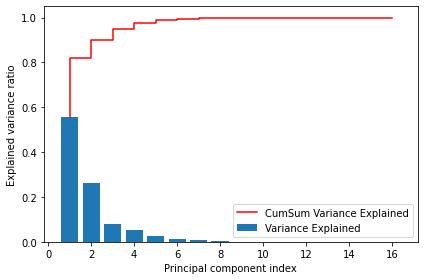

In [ ]:
# plt.bar(range(1,17),pca.explained_variance_ratio_,label='Variance Explained')
# plt.step(range(1,17),np.cumsum(pca.explained_variance_ratio_),label='CumSum Variance Explained',c='r')

# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

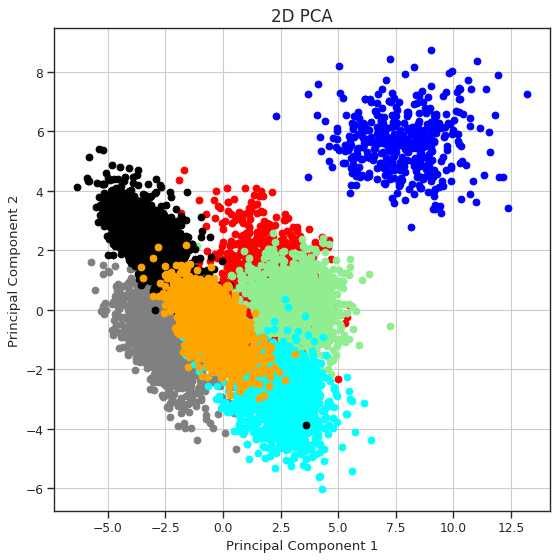

In [ ]:
# figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

# classes = [0, 1, 2, 3, 4, 5, 6]
# colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan','black','orange')
# for clas, color in zip(classes, colors):
#     plt.scatter(PCA_df.loc[PCA_df['y'] == clas, 'PC1'], PCA_df.loc[PCA_df['y'] == clas, 'PC2'], c = color)
    
# plt.xlabel('Principal Component 1', fontsize = 12)
# plt.ylabel('Principal Component 2', fontsize = 12)
# plt.title('2D PCA', fontsize = 15)
# plt.grid()